# SVM MODEL

## I. Extract data
1. Tải và xử lý dữ liệu từ các tệp .pkl, tạo ra các bộ dữ liệu huấn luyện và kiểm tra sẵn sàng cho mô hình SVM, đặc biệt là với các framework như PyTorch.
2. Dữ liệu từ mỗi tệp chứa ba loại trạng thái (focussed, unfocussed, drowsed) được ánh xạ thành các nhãn tương ứng (2, 1, và 0). Các dữ liệu này sau đó được gộp lại thành một tập hợp thống nhất.
3. Thực hiện chia dữ liệu ra các tập train và tập test sau đó chuyển quá Chuẩn hóa và chuyển dữ liệu thành Tensor PyTorch.
## II. SVM model
- Support Vector Machine (SVM) là một thuật toán học có giám sát, được sử dụng để phân loại và hồi quy. Trong phân loại, SVM hoạt động bằng cách tìm kiếm một siêu phẳng (hyperplane) tối ưu để phân chia dữ liệu thành các lớp khác nhau. Mục tiêu của SVM là tối đa hóa khoảng cách giữa các điểm dữ liệu gần nhất của hai lớp và siêu phẳng phân chia chúng. Khoảng cách này được gọi là lề (margin), và một siêu phẳng với lề lớn hơn thường có khả năng tổng quát hóa tốt hơn khi phân loại các điểm dữ liệu mới.
- Phân loại trạng thái nhận thức của người dùng (tập trung, buồn ngủ, hoặc không tập trung).
- Xử lý dữ liệu phức tạp và phi tuyến tính: EEG là tín hiệu phức tạp, có thể chứa các mẫu phi tuyến. SVM với hạt nhân (kernel) như Gaussian RBF hoặc Polynomial có khả năng mô hình hóa tốt các ranh giới phi tuyến trong không gian đặc trưng.
Chống nhiễu tốt: Tín hiệu EEG thường bị ảnh hưởng bởi nhiễu từ các nguồn bên ngoài hoặc thiết bị. SVM có khả năng xử lý tốt dữ liệu không hoàn hảo nhờ tối ưu hóa biên cách ly. \
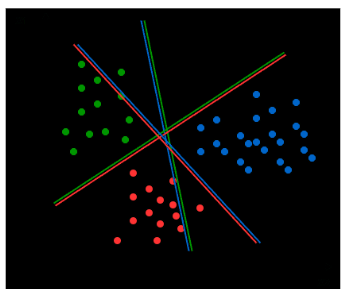

1. Ưu và nhược điểm của SVM trong bài toán EEG
  - Ưu điểm:
    - Tốt với dữ liệu có số chiều lớn và ít nhiễu.
    - Mô hình đơn giản, dễ sử dụng, và yêu cầu ít dữ liệu hơn so với các phương pháp học sâu.
    - Đạt hiệu quả cao trong việc tìm ranh giới phân chia tối ưu giữa các lớp.
  - Nhược điểm:
    - Yêu cầu chi phí tính toán lớn khi số lượng mẫu hoặc chiều dữ liệu rất lớn.
    - Việc lựa chọn kernel phù hợp và tinh chỉnh tham số có thể phức tạp.
    - Không dễ mở rộng cho bài toán đa lớp mà cần các chiến lược như one-vs-one hoặc one-vs-rest.
- Do dữ liệu quá lớn nên nếu như train model SVM thông thường thì sẽ rất lâu nên sử dụng framework pytorch để train model

## III. Hyper parameters tunning

1. Mục tiêu của việc hiệu chỉnh siêu tham số
- Hiệu chỉnh siêu tham số nhằm tối ưu hóa hiệu suất của mô hình học máy hoặc học sâu bằng cách tìm ra tổ hợp siêu tham số tốt nhất. Điều này giúp mô hình đạt được độ chính xác cao nhất hoặc chỉ số hiệu năng (như F1-score) tốt nhất trên tập dữ liệu xác thực.
2. Các siêu tham số được hiệu chỉnh
- Tỷ lệ học (Learning Rate - lr): Điều chỉnh bước nhảy khi cập nhật trọng số trong quá trình huấn luyện.
- Số lượng nơ-ron ở lớp ẩn (hidden_dim): Điều chỉnh kích thước của lớp ẩn để phù hợp với độ phức tạp của dữ liệu.
- Số epoch (epochs): Xác định số vòng lặp qua toàn bộ dữ liệu huấn luyện.
- Trọng số phạt cho regularization (weight_decay): Kiểm soát mức độ phạt cho các trọng số lớn để tránh overfitting.
- Tỷ lệ dropout (dropout): Giảm overfitting bằng cách ngẫu nhiên bỏ qua một số nơ-ron trong quá trình huấn luyện.
3. Phương pháp tìm kiếm siêu tham số
- Grid Search: Duyệt qua toàn bộ các tổ hợp có thể của các siêu tham số được định nghĩa trong lưới tham số.
4. Quy trình hiệu chỉnh
- Dữ liệu được chia thành các tập huấn luyện và kiểm tra thông qua phương pháp Cross-validation với k=5 (Stratified K-Fold). Điều này đảm bảo mô hình được đánh giá trên các tập con khác nhau của dữ liệu và kết quả không phụ thuộc vào một lần chia dữ liệu ngẫu nhiên.
- Dữ liệu được chia thành các tập huấn luyện và kiểm tra thông qua phương pháp Cross-validation với k=5 (Stratified K-Fold). Điều này đảm bảo mô hình được đánh giá trên các tập con khác nhau của dữ liệu và kết quả không phụ thuộc vào một lần chia dữ liệu ngẫu nhiên.
- Mỗi tổ hợp siêu tham số được huấn luyện trên tập huấn luyện. Quá trình tối ưu hóa sử dụng thuật toán Adam với hàm mất mát CrossEntropy.
- Sau mỗi lần huấn luyện, mô hình được đánh giá trên tập xác thực. Điểm F1-score trung bình của 5 lần gấp (folds) được tính và sử dụng để so sánh hiệu năng của các tổ hợp siêu tham số.
- Nếu điểm F1 trung bình của một tổ hợp siêu tham số cao hơn điểm tốt nhất hiện tại, tổ hợp này được lưu lại.
5. Kết quả tìm kiếm
- Sau khi duyệt qua toàn bộ tổ hợp, tổ hợp siêu tham số tốt nhất được chọn là tổ hợp có F1-score cao nhất.
- Kết quả cuối cùng bao gồm giá trị cụ thể của các siêu tham số tối ưu và điểm F1-score tương ứng.
6. Ý nghĩa của các siêu tham số
- Learning Rate (lr): Điều chỉnh bước nhảy trong việc tối ưu, cần cân đối giữa tốc độ hội tụ và độ ổn định.
- Hidden Dimensions (hidden_dim): Xác định khả năng học các mẫu phức tạp, quá ít nơ-ron có thể gây underfitting, trong khi quá nhiều nơ-ron có thể gây overfitting.
- Epochs: Quyết định thời gian huấn luyện. Số epoch quá ít có thể dẫn đến underfitting, trong khi quá nhiều có thể gây overfitting nếu không sử dụng cơ chế dừng sớm (early stopping).
- Weight Decay: Hỗ trợ regularization để giảm overfitting bằng cách ràng buộc độ lớn của trọng số.
- Dropout: Một kỹ thuật giảm overfitting bằng cách loại bỏ ngẫu nhiên một phần nơ-ron trong quá trình huấn luyện.

Việc hiệu chỉnh siêu tham số đóng vai trò quan trọng trong tối ưu hóa mô hình mạng nơ-ron. Phương pháp grid search với cross-validation đảm bảo tìm được tổ hợp siêu tham số phù hợp nhất để cải thiện hiệu suất tổng thể, đặc biệt là với các bài toán phức tạp như phân loại tín hiệu EEG.

## IV. Thử nghiệm trên data không có lable
Dữ liệu được lấy từ 1 file ngẫu nhiên và không được phân ra các file theo nhãn, sau đó được đưa qua model để dự đoán ra nhãn của nó



### 1. Khai báo thư viện và tải dữ liệu

In [4]:
# Xử lý dữ liệu
import os
import pickle
import numpy as np
import pandas as pd

# Xử lý dữ liệu và mô hình hóa
import scipy.io
from scipy.io import loadmat
from scipy.fft import fft, ifft, fftfreq
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.svm import SVC
from sklearn import metrics

# TensorFlow
from tensorflow.keras.utils import to_categorical

# PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [28]:
!kaggle datasets download inancigdem/eeg-data-for-mental-attention-state-detection
!unzip "/content/eeg-data-for-mental-attention-state-detection.zip"

Dataset URL: https://www.kaggle.com/datasets/inancigdem/eeg-data-for-mental-attention-state-detection
License(s): copyright-authors
 98% 544M/557M [00:05<00:00, 106MB/s]
100% 557M/557M [00:05<00:00, 112MB/s]
Archive:  /content/eeg-data-for-mental-attention-state-detection.zip
  inflating: EEG Data/eeg_record1.mat  
  inflating: EEG Data/eeg_record10.mat  
  inflating: EEG Data/eeg_record11.mat  
  inflating: EEG Data/eeg_record12.mat  
  inflating: EEG Data/eeg_record13.mat  
  inflating: EEG Data/eeg_record14.mat  
  inflating: EEG Data/eeg_record15.mat  
  inflating: EEG Data/eeg_record16.mat  
  inflating: EEG Data/eeg_record17.mat  
  inflating: EEG Data/eeg_record18.mat  
  inflating: EEG Data/eeg_record19.mat  
  inflating: EEG Data/eeg_record2.mat  
  inflating: EEG Data/eeg_record20.mat  
  inflating: EEG Data/eeg_record21.mat  
  inflating: EEG Data/eeg_record22.mat  
  inflating: EEG Data/eeg_record23.mat  
  inflating: EEG Data/eeg_record24.mat  
  inflating: EEG Data/eeg_re

In [1]:
!gdown --id 1HLbTjcOzEv5wI7U4ajjaeLeaHEliPzQI

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1HLbTjcOzEv5wI7U4ajjaeLeaHEliPzQI
From (redirected): https://drive.google.com/uc?id=1HLbTjcOzEv5wI7U4ajjaeLeaHEliPzQI&confirm=t&uuid=d3696f77-a745-4505-98f5-b5f80cd08814
To: /content/data_for_SVM_KNN-20241205T162108Z-001.zip
100% 494M/494M [00:12<00:00, 40.4MB/s]


In [2]:
!unzip /content/data_for_SVM_KNN-20241205T162108Z-001.zip

Archive:  /content/data_for_SVM_KNN-20241205T162108Z-001.zip
  inflating: data_for_SVM_KNN/eeg_record17.pkl  
  inflating: data_for_SVM_KNN/eeg_record11.pkl  
  inflating: data_for_SVM_KNN/eeg_record18.pkl  
  inflating: data_for_SVM_KNN/eeg_record28.pkl  
  inflating: data_for_SVM_KNN/eeg_record5.pkl  
  inflating: data_for_SVM_KNN/eeg_record26.pkl  
  inflating: data_for_SVM_KNN/eeg_record4.pkl  
  inflating: data_for_SVM_KNN/eeg_record20.pkl  
  inflating: data_for_SVM_KNN/eeg_record23.pkl  
  inflating: data_for_SVM_KNN/eeg_record9.pkl  
  inflating: data_for_SVM_KNN/eeg_record25.pkl  
  inflating: data_for_SVM_KNN/eeg_record24.pkl  
  inflating: data_for_SVM_KNN/eeg_record32.pkl  
  inflating: data_for_SVM_KNN/eeg_record15.pkl  
  inflating: data_for_SVM_KNN/eeg_record14.pkl  
  inflating: data_for_SVM_KNN/eeg_record2.pkl  
  inflating: data_for_SVM_KNN/eeg_record22.pkl  
  inflating: data_for_SVM_KNN/eeg_record3.pkl  
  inflating: data_for_SVM_KNN/eeg_record6.pkl  
  inflating: d

In [13]:
with open('/content/data_for_SVM_KNN/eeg_record5.pkl', 'rb') as f:
  loaded_data = pickle.load(f)

loaded_data

{'channels': ['F7', 'F3', 'P7', 'O1', 'O2', 'P8', 'AF4'],
 'fs': 128,
 'trial': {'focussed': array([[[-11.07320122, -26.79783399, -19.79360772, ..., -22.68620316,
           -22.68810373, -22.68997267],
          [-15.4737132 , -19.8678417 , -26.30994785, ..., -33.43571825,
           -33.43082877, -33.42593038],
          [ -8.515827  , -37.21837558, -25.6913631 , ..., -21.0071327 ,
           -21.00857504, -21.00998141],
          ...,
          [-10.45762346, -25.56180743, -19.87754761, ..., -31.65195448,
           -31.6445952 , -31.6373731 ],
          [-10.34374281, -31.86756513, -19.51526592, ..., -31.09903101,
           -31.10855454, -31.11786742],
          [ -8.34686868, -43.70989583, -35.83211672, ..., -34.42057109,
           -34.42016999, -34.41980474]],
  
         [[ -3.49226417, -35.03581304, -23.10492237, ..., -37.89464954,
           -37.89163642, -37.88867901],
          [ -3.69400799, -29.31391234, -25.63847367, ..., -35.31731553,
           -35.31864116, -35.31999

In [14]:
np.shape(loaded_data['trial']['focussed'])
a = loaded_data['trial']['focussed'][:,2,:]
np.shape(a)

(288, 321)

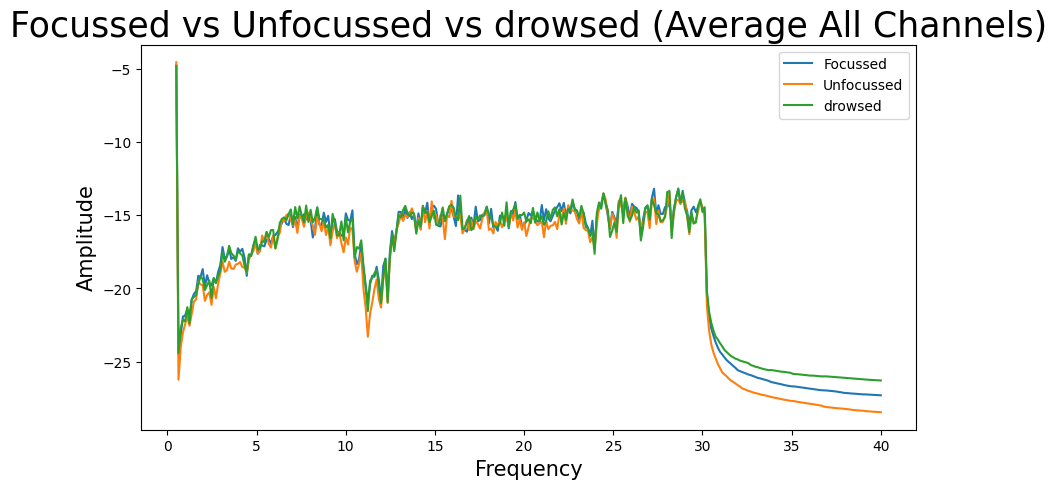

In [16]:
a_avg_all = loaded_data['trial']['focussed'].mean(axis=1)
b_avg_all = loaded_data['trial']['unfocussed'].mean(axis=1)
c_avg_all = loaded_data['trial']['drowsed'].mean(axis=1)

plt.figure(figsize=(10, 5))
plt.title('Focussed vs Unfocussed vs drowsed (Average All Channels)', fontsize=25)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.plot(np.linspace(0.5, 40, len(a_avg_all.mean(axis=0))), a_avg_all.mean(axis=0), label='Focussed')
plt.plot(np.linspace(0.5, 40, len(b_avg_all.mean(axis=0))), b_avg_all.mean(axis=0), label='Unfocussed')
plt.plot(np.linspace(0.5, 40, len(c_avg_all.mean(axis=0))), c_avg_all.mean(axis=0), label='drowsed')
plt.legend()
plt.show()


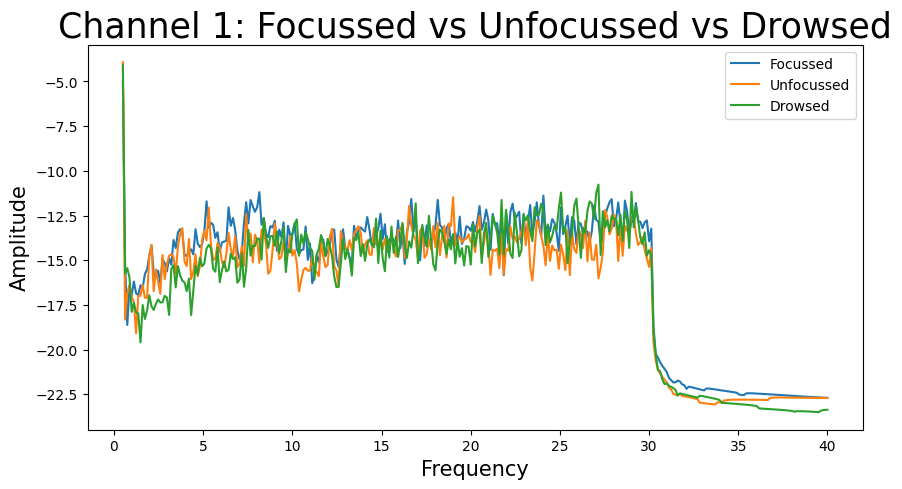

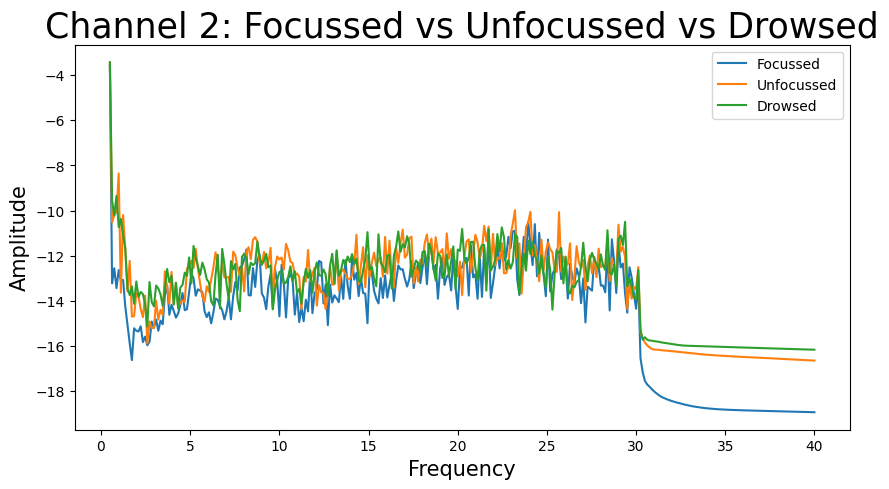

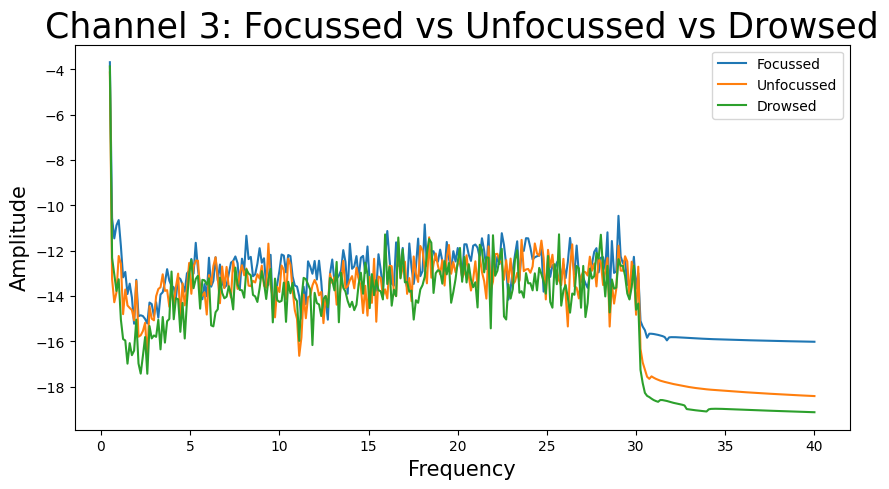

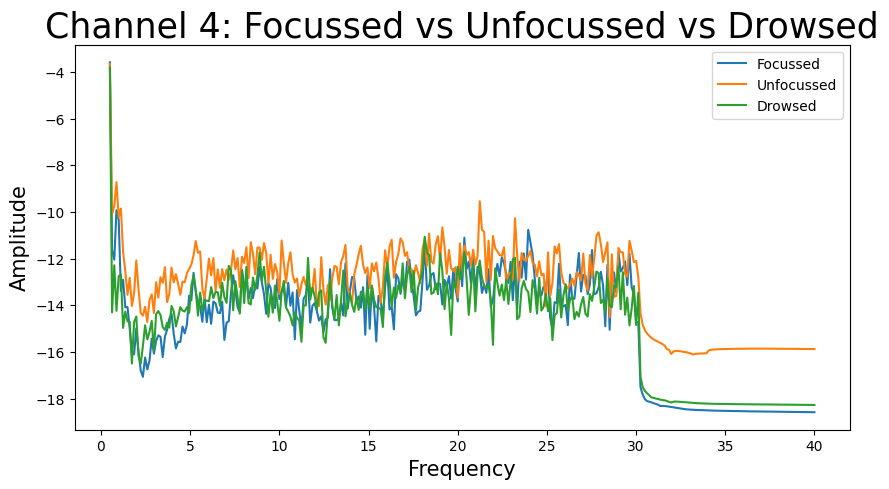

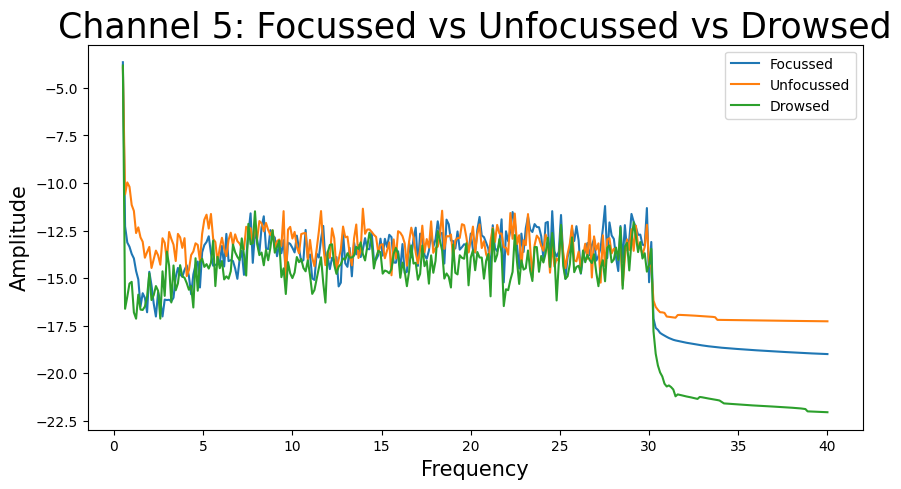

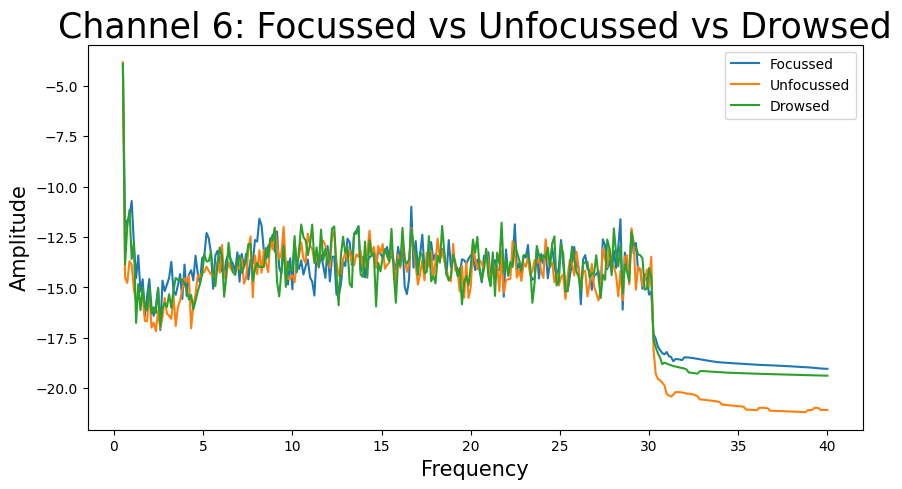

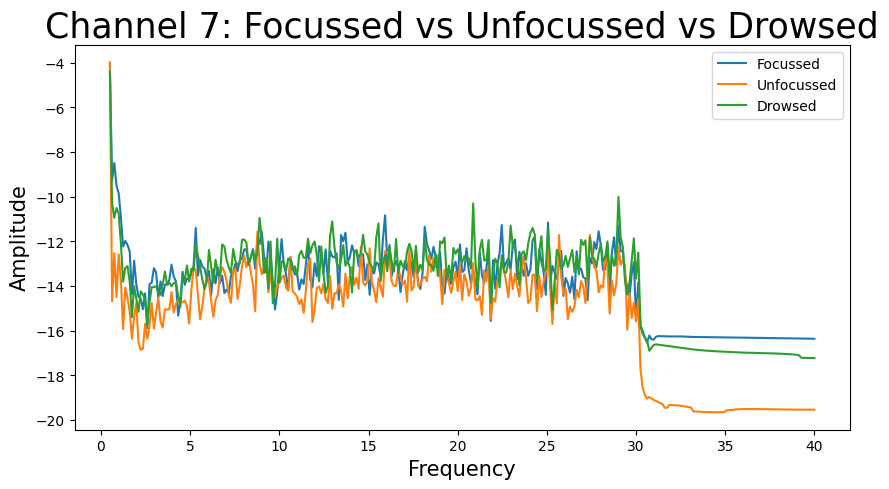

In [12]:
for channel in range(loaded_data['trial']['focussed'].shape[1]):
    a_channel = loaded_data['trial']['focussed'][:, channel, :]
    b_channel = loaded_data['trial']['unfocussed'][:, channel, :]
    c_channel = loaded_data['trial']['drowsed'][:, channel, :]

    plt.figure(figsize=(10, 5))
    plt.title(f'Channel {channel + 1}: Focussed vs Unfocussed vs Drowsed', fontsize=25)
    plt.xlabel('Frequency', fontsize=15)
    plt.ylabel('Amplitude', fontsize=15)
    plt.plot(np.linspace(0.5, 40, len(a_channel.mean(axis=0))), a_channel.mean(axis=0), label='Focussed')
    plt.plot(np.linspace(0.5, 40, len(b_channel.mean(axis=0))), b_channel.mean(axis=0), label='Unfocussed')
    plt.plot(np.linspace(0.5, 40, len(c_channel.mean(axis=0))), c_channel.mean(axis=0), label='Drowsed')
    plt.legend()
    plt.show()


Các các đồ thị hiển thị biểu đồ của các kênh EEG khác nhau (Kênh 1 đến Kênh 7 tương ứng là các kênh 'F7', 'F3', 'P7', 'O1', 'O2', 'P8', 'AF4') hiển thị các giá trị biên độ cho các trạng thái tập trung, không tập trung và buồn ngủ trên các tần số khác nhau.
- Đối với mỗi kênh, trạng thái tập trung được biểu thị bằng đường màu xanh lam, trạng thái không tập trung được biểu thị bằng đường màu xanh lá cây và trạng thái buồn ngủ được biểu thị bằng đường màu cam.
- Các mẫu và đỉnh trong biểu đồ biểu thị sự khác biệt về dấu hiệu điện não đồ giữa các trạng thái và tần số tinh thần. Ví dụ, trạng thái tập trung có xu hướng có biên độ cao hơn ở các dải tần số nhất định so với trạng thái không tập trung và buồn ngủ.
- Hình dạng và cường độ của sự thay đổi biên độ khác nhau giữa các kênh khác nhau, cho thấy rằng các vùng não khác nhau biểu hiện các kiểu hoạt động riêng biệt tùy thuộc vào trạng thái tinh thần.

In [17]:

class FeatureExtractor:
    def __init__(self, folder_path, batch_size=256, test_size=0.2, random_state=33, sample_fraction=None):
        """
        Khởi tạo lớp FeatureExtractor.

        :param folder_path: Đường dẫn tới thư mục chứa các tệp .pkl
        :param batch_size: Kích thước batch khi tạo DataLoader
        :param test_size: Tỷ lệ dữ liệu kiểm tra
        :param random_state: Giá trị seed để đảm bảo kết quả ngẫu nhiên lặp lại
        :param sample_fraction: Tỷ lệ lấy mẫu ngẫu nhiên (giảm kích thước dữ liệu), None nếu không muốn giảm
        """
        self.folder_path = folder_path
        self.batch_size = batch_size
        self.test_size = test_size
        self.random_state = random_state
        self.scaler = StandardScaler()
        self.sample_fraction = sample_fraction

    def load_data(self):
        """
        Tải dữ liệu từ các tệp .pkl trong thư mục và chia thành tập train/test.

        :return: Xtrain, Xtest, ytrain, ytest
        """
        X_list, y_list = [], []
        for file_name in os.listdir(self.folder_path):
            if file_name.endswith('.pkl'):
                file_path = os.path.join(self.folder_path, file_name)
                with open(file_path, 'rb') as f:
                    data = pickle.load(f)
                x1, x2, x3 = data['trial']['focussed'], data['trial']['unfocussed'], data['trial']['drowsed']
                y1, y2, y3 = np.full(len(x1), 2), np.full(len(x2), 1), np.full(len(x3), 0)
                X_list.extend([x1, x2, x3])
                y_list.extend([y1, y2, y3])

        X = np.concatenate(X_list, axis=0)
        y = np.concatenate(y_list, axis=0)
        X = X.reshape(X.shape[0], -1)

        # Nếu sample_fraction được cung cấp, giảm kích thước dữ liệu
        if self.sample_fraction:
            sample_size = int(len(X) * self.sample_fraction)
            perm = np.random.permutation(len(X))[:sample_size]
            X, y = X[perm], y[perm]

        return train_test_split(X, y, test_size=self.test_size, random_state=self.random_state)

    def preprocess_data(self, Xtrain, Xtest, ytrain, ytest):
        """
        Chuẩn hóa và chuyển dữ liệu thành Tensor PyTorch.

        :return: train_loader, test_loader
        """
        Xtrain = self.scaler.fit_transform(Xtrain)
        Xtest = self.scaler.transform(Xtest)

        train_data = torch.utils.data.TensorDataset(torch.tensor(Xtrain, dtype=torch.float32),
                                                    torch.tensor(ytrain, dtype=torch.long))
        test_data = torch.utils.data.TensorDataset(torch.tensor(Xtest, dtype=torch.float32),
                                                   torch.tensor(ytest, dtype=torch.long))

        train_loader = torch.utils.data.DataLoader(train_data, batch_size=self.batch_size, shuffle=True)
        test_loader = torch.utils.data.DataLoader(test_data, batch_size=self.batch_size, shuffle=False)

        return train_loader, test_loader


Class trên để load dữ liệu và chuyển thành Tensor Pytorch để chuẩn bị cho việc train model


In [23]:

class ModelTrainer:
    def __init__(self, input_dim, num_classes, lr=0.0001):
        self.model = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Linear(512, num_classes)
        )
        self.criterion = nn.CrossEntropyLoss()
        self.optimizer = optim.Adam(self.model.parameters(), lr=lr)
        self.loss_history = {"train": [], "test": []}
        self.accuracy_history = {"train": [], "test": []}

    def train_one_epoch(self, train_loader):
        """Huấn luyện một epoch."""
        self.model.train()
        total_loss, correct, total = 0.0, 0, 0
        for X_batch, y_batch in train_loader:
            self.optimizer.zero_grad()
            outputs = self.model(X_batch)
            loss = self.criterion(outputs, y_batch)
            loss.backward()
            self.optimizer.step()
            total_loss += loss.item()
            _, predicted = outputs.max(1)
            correct += predicted.eq(y_batch).sum().item()
            total += y_batch.size(0)
        accuracy = correct / total
        return total_loss / len(train_loader), accuracy

    def evaluate(self, loader):
        """Đánh giá mô hình trên tập dữ liệu."""
        self.model.eval()
        total_loss, correct, total = 0.0, 0, 0
        with torch.no_grad():
            for X_batch, y_batch in loader:
                outputs = self.model(X_batch)
                loss = self.criterion(outputs, y_batch)
                total_loss += loss.item()
                _, predicted = outputs.max(1)
                correct += predicted.eq(y_batch).sum().item()
                total += y_batch.size(0)
        accuracy = correct / total
        return total_loss / len(loader), accuracy

    def train(self, train_loader, test_loader, epochs):
        """Huấn luyện mô hình qua nhiều epoch."""
        for epoch in range(epochs):
            train_loss, train_acc = self.train_one_epoch(train_loader)
            test_loss, test_acc = self.evaluate(test_loader)

            self.loss_history["train"].append(train_loss)
            self.loss_history["test"].append(test_loss)
            self.accuracy_history["train"].append(train_acc)
            self.accuracy_history["test"].append(test_acc)

            print(f"Epoch {epoch + 1}/{epochs} -> "
                  f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
                  f"Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}")

    def plot_history(self):
        """Vẽ đồ thị lịch sử loss và accuracy."""
        epochs = range(1, len(self.loss_history["train"]) + 1)
        plt.figure(figsize=(12, 5))

        # Loss plot
        plt.subplot(1, 2, 1)
        plt.plot(epochs, self.loss_history["train"], label="Train Loss")
        plt.plot(epochs, self.loss_history["test"], label="Test Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.title("Loss History")
        plt.legend()

        # Accuracy plot
        plt.subplot(1, 2, 2)
        plt.plot(epochs, self.accuracy_history["train"], label="Train Accuracy")
        plt.plot(epochs, self.accuracy_history["test"], label="Test Accuracy")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.title("Accuracy History")
        plt.legend()

        plt.tight_layout()
        plt.show()

    def evaluate_with_metrics(self, loader):
        """Đánh giá mô hình với các chỉ số chi tiết và in kết quả."""
        self.model.eval()
        all_preds, all_targets = [], []
        with torch.no_grad():
            for X_batch, y_batch in loader:
                outputs = self.model(X_batch)
                _, predicted = outputs.max(1)
                all_preds.extend(predicted.cpu().numpy())
                all_targets.extend(y_batch.cpu().numpy())

        cm = confusion_matrix(all_targets, all_preds)
        acc = np.trace(cm) / np.sum(cm)  # Độ chính xác tổng thể
        report = classification_report(all_targets, all_preds, target_names=[str(i) for i in range(len(cm))])

        # In kết quả
        print("\n--- Độ chính xác ---")
        print(f"Accuracy: {acc:.4f}")
        print("\n--- Ma trận nhầm lẫn ---")
        print(cm)
        print("\n--- Báo cáo chi tiết ---")
        print(report)

        return cm, acc, report

    def plot_confusion_matrix(self, cm):
        """Vẽ ma trận nhầm lẫn."""
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=True, yticklabels=True)
        plt.xlabel("Predicted Labels")
        plt.ylabel("True Labels")
        plt.title("Confusion Matrix")
        plt.show()


Epoch 1/50 -> Train Loss: 0.9974, Train Acc: 0.5173, Test Loss: 0.9068, Test Acc: 0.6003
Epoch 2/50 -> Train Loss: 0.8328, Train Acc: 0.6599, Test Loss: 0.8111, Test Acc: 0.6707
Epoch 3/50 -> Train Loss: 0.7188, Train Acc: 0.7313, Test Loss: 0.7245, Test Acc: 0.7123
Epoch 4/50 -> Train Loss: 0.6358, Train Acc: 0.7684, Test Loss: 0.6763, Test Acc: 0.7309
Epoch 5/50 -> Train Loss: 0.5741, Train Acc: 0.7899, Test Loss: 0.6363, Test Acc: 0.7480
Epoch 6/50 -> Train Loss: 0.5160, Train Acc: 0.8171, Test Loss: 0.6128, Test Acc: 0.7539
Epoch 7/50 -> Train Loss: 0.4750, Train Acc: 0.8341, Test Loss: 0.5927, Test Acc: 0.7590
Epoch 8/50 -> Train Loss: 0.4332, Train Acc: 0.8524, Test Loss: 0.6165, Test Acc: 0.7415
Epoch 9/50 -> Train Loss: 0.3997, Train Acc: 0.8663, Test Loss: 0.5739, Test Acc: 0.7691
Epoch 10/50 -> Train Loss: 0.3699, Train Acc: 0.8789, Test Loss: 0.5492, Test Acc: 0.7793
Epoch 11/50 -> Train Loss: 0.3447, Train Acc: 0.8895, Test Loss: 0.5322, Test Acc: 0.7880
Epoch 12/50 -> Trai

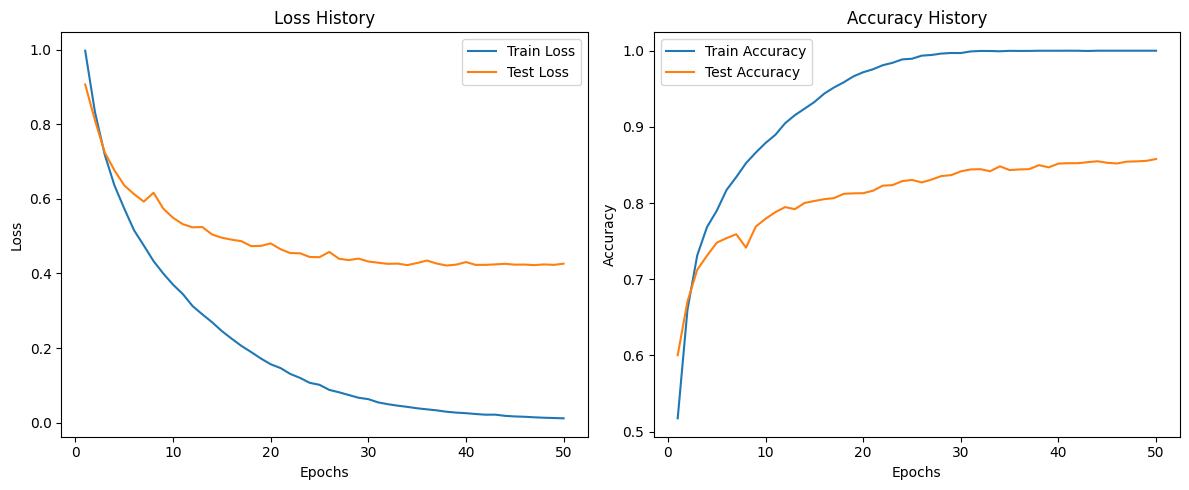


--- Độ chính xác ---
Accuracy: 0.8578

--- Ma trận nhầm lẫn ---
[[1700  145   96]
 [ 147 1652  172]
 [ 107  167 1678]]

--- Báo cáo chi tiết ---
              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1941
           1       0.84      0.84      0.84      1971
           2       0.86      0.86      0.86      1952

    accuracy                           0.86      5864
   macro avg       0.86      0.86      0.86      5864
weighted avg       0.86      0.86      0.86      5864



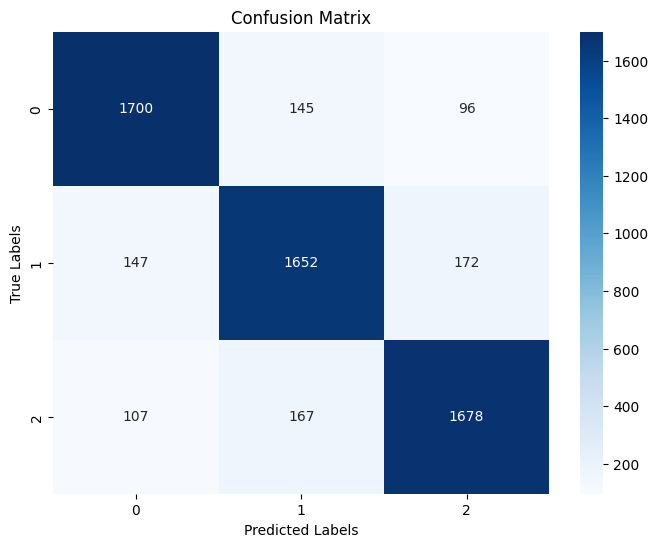

In [24]:
if __name__ == "__main__":
    folder_path = '/content/data_for_SVM_KNN'

    # Feature Extraction
    feature_extractor = FeatureExtractor(folder_path)
    Xtrain, Xtest, ytrain, ytest = feature_extractor.load_data()
    train_loader, test_loader = feature_extractor.preprocess_data(Xtrain, Xtest, ytrain, ytest)

    # Model Training & Evaluation
    input_dim = Xtrain.shape[1]
    num_classes = len(np.unique(ytrain))
    trainer = ModelTrainer(input_dim, num_classes)

    trainer.train(train_loader, test_loader, epochs=50)

    trainer.plot_history()

    # Đánh giá và in kết quả chi tiết trên test_loader
    cm, acc, report = trainer.evaluate_with_metrics(test_loader)

    # Vẽ ma trận nhầm lẫn
    trainer.plot_confusion_matrix(cm)


1. Đồ thị "Loss History" và "Accuracy History":
- Train Loss giảm dần: Biểu đồ cho thấy mất mát trên tập huấn luyện giảm đều qua các epoch, chứng tỏ mô hình học được và tối ưu hóa tốt trên tập huấn luyện.
- Test Loss chững lại: Mặc dù mất mát trên tập kiểm tra giảm lúc đầu, nhưng sau khoảng epoch 20-30, nó giữ ổn định và không giảm nhiều nữa. Điều này cho thấy mô hình có thể đạt đến giới hạn tối ưu trên tập dữ liệu kiểm tra.
- Train Accuracy cao hơn Test Accuracy: Độ chính xác trên tập huấn luyện tiến gần 100%, trong khi độ chính xác trên tập kiểm tra chững lại ở mức ~85%
2. Độ chính xác tổng thể
- Accuracy: 85.78%: Đây là kết quả tương đối tốt, đặc biệt trong bối cảnh dữ liệu EEG thường phức tạp và có nhiễu.
3. Phân tích ma trận nhầm lẫn
- Lớp Drowsy:
  - Dự đoán đúng: 1700/1941 = 87.5%.
  - Sai lệch chủ yếu: Dự đoán nhầm sang lớp Unfocused (145 mẫu).
- Lớp Unfocused:
  - Dự đoán đúng: 1652/1971 = 83.8%.
  - Sai lệch chính: Dự đoán nhầm sang lớp Focused (172 mẫu).
- Lớp Focused:
  - Dự đoán đúng: 1678/1952 = 86%.
  - Sai lệch chủ yếu: Dự đoán nhầm sang lớp Unfocused (167 mẫu).
- Lớp Drowsy có hiệu suất tốt nhất với tỷ lệ dự đoán đúng cao hơn một chút so với các lớp khác.
- Sự nhầm lẫn giữa các lớp liền kề (Drowsy-Unfocused, Unfocused-Focused) cho thấy mô hình gặp khó khăn trong việc phân tách các lớp có tín hiệu đặc điểm tương đồng.
4. Báo cáo chi tiết (Precision, Recall, F1-score)
- Lớp Drowsy:
  - Precision = 87%: Trong số các dự đoán là lớp Drowsy, 87% là đúng.
  - Recall = 88%: Trong số thực tế là lớp Drowsy, mô hình nhận diện đúng 88%.
  - F1-score = 87%: Trung bình hài hòa giữa Precision và Recall, thể hiện mô hình cân bằng tốt.
- Lớp Unfocused:
  - Precision = 84%, Recall = 84%, F1-score = 84%: Hiệu suất thấp hơn một chút so với lớp Drowsy.
- Lớp Focused:
 - Precision = 86%, Recall = 86%, F1-score = 86%: Cân bằng và tương đối tốt.
- Macro Avg (Trung bình trên các lớp): Precision, Recall, và F1-score đều đạt 86%, cho thấy mô hình duy trì hiệu suất đồng đều trên tất cả các lớp.
- Weighted Avg (Trung bình có trọng số theo số lượng mẫu): Cũng đạt 86%, khẳng định không có lớp nào bị lệch trọng số quá mức.



In [ ]:

class HyperparameterTuner:
    def __init__(self, input_dim, num_classes):
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.best_params = None
        self.best_score = 0

    def create_model(self, hidden_dim, dropout):
        """Tạo mô hình neural network với lớp ẩn có thể điều chỉnh."""
        return nn.Sequential(
            nn.Linear(self.input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, self.num_classes)
        )

    def train_and_validate(self, X, y, params):
        """Thực hiện cross-validation cho một tập hợp hyperparameters."""
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        fold_scores = []

        for train_index, val_index in skf.split(X, y):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]

            # Chuyển sang PyTorch tensors
            X_train = torch.tensor(X_train, dtype=torch.float32)
            X_val = torch.tensor(X_val, dtype=torch.float32)
            y_train = torch.tensor(y_train, dtype=torch.long)
            y_val = torch.tensor(y_val, dtype=torch.long)

            # Tạo mô hình
            model = self.create_model(params['hidden_dim'], params['dropout'])

            # Loss và optimizer
            criterion = nn.CrossEntropyLoss()
            optimizer = optim.Adam(model.parameters(),
                                   lr=params['lr'],
                                   weight_decay=params['weight_decay'])

            # Huấn luyện
            for epoch in range(params['epochs']):
                model.train()
                optimizer.zero_grad()
                outputs = model(X_train)
                loss = criterion(outputs, y_train)
                loss.backward()
                optimizer.step()

            # Đánh giá
            model.eval()
            with torch.no_grad():
                val_outputs = model(X_val)
                _, predicted = torch.max(val_outputs, 1)
                val_score = f1_score(y_val.numpy(), predicted.numpy(), average='weighted')
                fold_scores.append(val_score)

        mean_score = np.mean(fold_scores)

        if mean_score > self.best_score:
            self.best_score = mean_score
            self.best_params = params

        return mean_score

    def tune(self, X, y):
        """Thực hiện grid search hyperparameters."""
        param_grid = {
            'lr': [0.001, 0.0001, 0.00001],
            'hidden_dim': [64, 128, 256, 512],
            'epochs': [50, 100],
            'weight_decay': [1e-4, 1e-5],
            'dropout': [0.3, 0.5]
        }

        grid = ParameterGrid(param_grid)
        results = []

        for params in grid:
            score = self.train_and_validate(X, y, params)
            results.append({'params': params, 'score': score})
            print(f"Params: {params}, Score: {score}")

        results.sort(key=lambda x: x['score'], reverse=True)
        return self.best_params


# Pipeline
def run_pipeline(folder_path):
    # Bước 1: Load và preprocess dữ liệu
    extractor = FeatureExtractor(folder_path, sample_fraction=0.1)  # Lấy 10% dữ liệu
    Xtrain, Xtest, ytrain, ytest = extractor.load_data()
    X = np.concatenate((Xtrain, Xtest), axis=0)
    y = np.concatenate((ytrain, ytest), axis=0)

    # Bước 2: Tuning hyperparameters
    input_dim = X.shape[1]
    num_classes = len(np.unique(y))
    tuner = HyperparameterTuner(input_dim, num_classes)
    best_params = tuner.tune(X, y)

    # Kết quả
    print("\n--- Hyperparameters Tốt Nhất ---")
    print(best_params)


# Chạy pipeline
folder_path = "/content/data_for_SVM_KNN"
run_pipeline(folder_path)


Quá trình hyper parameters tuning cho ra các tham số:
best_params = {'dropout': 0.3, 'epochs': 50, 'hidden_dim': 256, 'lr': 0.001, 'weight_decay': 0.0001}

In [25]:

def train_and_evaluate(folder_path, best_params):
    # Bước 1: Load dữ liệu gốc
    extractor = FeatureExtractor(folder_path)
    Xtrain, Xtest, ytrain, ytest = extractor.load_data()

    # Chuẩn hóa và chuyển đổi dữ liệu thành tensor
    train_loader, test_loader = extractor.preprocess_data(Xtrain, Xtest, ytrain, ytest)

    # Bước 2: Khởi tạo mô hình với tham số tốt nhất
    input_dim = Xtrain.shape[1]
    num_classes = len(np.unique(ytrain))
    model = nn.Sequential(
        nn.Linear(input_dim, best_params['hidden_dim']),
        nn.ReLU(),
        nn.Dropout(best_params['dropout']),
        nn.Linear(best_params['hidden_dim'], num_classes)
    )

    # Loss và optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(),
                           lr=best_params['lr'],
                           weight_decay=best_params['weight_decay'])

    # Bước 3: Huấn luyện mô hình
    model.train()
    for epoch in range(best_params['epochs']):
        total_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        if (epoch + 1) % 10 == 0 or epoch == 0:  # In ra loss mỗi 10 epoch
            print(f"Epoch {epoch + 1}/{best_params['epochs']}, Loss: {total_loss / len(train_loader):.4f}")

    # Bước 4: Đánh giá mô hình
    model.eval()
    all_preds = []
    all_targets = []
    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            preds = torch.argmax(F.softmax(outputs, dim=1), dim=1)
            all_preds.extend(preds.numpy())
            all_targets.extend(y_batch.numpy())

    # Bước 5: Tính toán các chỉ số đánh giá
    acc = accuracy_score(all_targets, all_preds)
    cm = confusion_matrix(all_targets, all_preds)
    report = classification_report(all_targets, all_preds, target_names=['Drowsed', 'Unfocussed', 'Focussed'])

    # In kết quả
    print("\n--- Độ chính xác ---")
    print(f"Accuracy: {acc:.4f}")
    print("\n--- Ma trận nhầm lẫn ---")
    print(cm)
    print("\n--- Báo cáo chi tiết ---")
    print(report)

    return model


# Huấn luyện và đánh giá mô hình với tập dữ liệu gốc
best_params = {'dropout': 0.3, 'epochs': 50, 'hidden_dim': 256, 'lr': 0.001, 'weight_decay': 0.0001}
folder_path = "/content/data_for_SVM_KNN"
model = train_and_evaluate(folder_path, best_params)


Epoch 1/50, Loss: 0.9534
Epoch 10/50, Loss: 0.2943
Epoch 20/50, Loss: 0.1240
Epoch 30/50, Loss: 0.0753
Epoch 40/50, Loss: 0.0944
Epoch 50/50, Loss: 0.1017

--- Độ chính xác ---
Accuracy: 0.8678

--- Ma trận nhầm lẫn ---
[[1763  110   68]
 [ 151 1670  150]
 [ 117  179 1656]]

--- Báo cáo chi tiết ---
              precision    recall  f1-score   support

     Drowsed       0.87      0.91      0.89      1941
  Unfocussed       0.85      0.85      0.85      1971
    Focussed       0.88      0.85      0.87      1952

    accuracy                           0.87      5864
   macro avg       0.87      0.87      0.87      5864
weighted avg       0.87      0.87      0.87      5864



1. Hiệu suất tổng thể:
- Accuracy tăng nhẹ: Từ 85.78% (model cũ) lên 86.78% (model mới), cho thấy hiệu suất đã được cải thiện.
- Loss thấp hơn: Model mới đạt mức loss cuối cùng là 0.1017, trong khi model cũ có mức Test Loss chững lại quanh 0.4. Điều này cho thấy mô hình mới đã tối ưu hóa tốt hơn.
2. Ma trận nhầm lẫn:
So sánh sự phân loại nhầm lẫn giữa hai mô hình:

- Lớp "Drowsed" (Lớp 0):
  - Số dự đoán đúng tăng từ 1700 (model cũ) lên 1763 (model mới).
  - Sai số với lớp khác giảm rõ rệt (nhầm lẫn với lớp 1 giảm từ 145 xuống 110, nhầm lẫn với lớp 2 giảm từ 96 xuống 68).
- Lớp "Unfocussed" (Lớp 1):
  - Dự đoán đúng tăng từ 1652 lên 1670.
  - Sai số với lớp 0 giảm nhẹ (từ 147 xuống 151), nhưng sai số với lớp 2 giảm từ 172 xuống 150.
- Lớp "Focussed" (Lớp 2):
  - Số dự đoán đúng giảm từ 1678 xuống 1656, nhưng tổng thể mô hình vẫn ổn định.
Nhận xét ma trận nhầm lẫn:

- Model mới giảm nhầm lẫn giữa các lớp 0-1 và 0-2, cho thấy khả năng phân biệt giữa các trạng thái đã cải thiện.
-Tuy nhiên, nhầm lẫn giữa lớp 1-2 vẫn còn tương đối cao, cần chú ý hơn trong việc xử lý các tín hiệu tương đồng.


In [30]:
class SignalPreprocessing:
    def __init__(self, fs=128, freq_range=(0, 30)):
        self.fs = fs
        self.freq_range = freq_range  # Bảng tần số lọc mặc định là từ 0 đến 30 Hz

    def FFTFilter(self, data):
        """Lọc tín hiệu bằng FFT trong khoảng tần số đã chỉ định."""
        N = len(data)
        freqs = fftfreq(N, 1 / self.fs)
        fft_vals = fft(data)
        fft_vals[(freqs < self.freq_range[0]) | (freqs > self.freq_range[1])] = 0
        return np.real(ifft(fft_vals))

    def preprocess(self, data):
        """Tiến hành lọc FFT cho toàn bộ dữ liệu."""
        return np.array([self.FFTFilter(channel_data) for channel_data in data])

In [31]:
class FeatureEngineering:
    def __init__(self, fs=128, useful_channels=None, duration=30):
        self.fs = fs
        self.useful_channels = useful_channels if useful_channels else []
        self.duration = duration

    def get_useful_channel_indices(self, all_channels):
        """Lấy chỉ số các kênh cần thiết từ danh sách kênh."""
        return [all_channels.index(c) for c in self.useful_channels if c in all_channels]

    @staticmethod
    def getTimeSpectrum(data, fs=128, fmax=40, interval=8, step=2):
        """Tính phổ thời gian sử dụng FFT."""
        window_size = int(interval * fs)
        step_size = int(step * fs)
        energy = []

        for start in range(0, len(data) - window_size, step_size):
            window_data = data[start:start + window_size]
            fft_vals = np.fft.fft(window_data)
            freqs = np.fft.fftfreq(len(window_data), 1/fs)
            pos_freqs = freqs[freqs >= 0]
            pos_fft_vals = np.abs(fft_vals[freqs >= 0])

            valid_freqs = pos_freqs[pos_freqs <= fmax]
            valid_fft_vals = pos_fft_vals[:len(valid_freqs)]
            energy.append(valid_fft_vals ** 2)

        scaler = MinMaxScaler()
        energy = scaler.fit_transform(energy)
        return np.array(energy)

    def cleanData(self, data, fmax=40, interval=8, step=2):
        """Làm sạch dữ liệu và trích xuất đặc trưng năng lượng."""
        max_samples = self.duration * 60 * self.fs
        data = data[:, :max_samples]

        energy_features = []
        for i in range(data.shape[0]):
            energy_features.append(self.getTimeSpectrum(
                data[i], fs=self.fs, fmax=fmax, interval=interval, step=step
            ))

        E = np.array(energy_features)
        E = E.reshape([E.shape[1], E.shape[0], E.shape[2]], order='F')
        return E

    @staticmethod
    def power_to_dB(power):
        """
        Chuyển đổi giá trị công suất sang đơn vị decibel (dB).

        Parameters:
        - power: Mảng hoặc giá trị công suất (Power).

        Returns:
        - dB: Mảng hoặc giá trị tương ứng trong đơn vị decibel (dB).
        """
        power = np.maximum(power, 1e-10)  # Thay giá trị <= 0 bằng một giá trị nhỏ nhất để tránh log(0)
        return 10 * np.log10(power)

In [32]:
# Kiểm tra sự tồn tại của thư mục và tạo nếu chưa có
folder_path = '/content/data_for_streamlit'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

def process_single_file(input_dir, output_file_0_30, output_file_30_end, fs=128, channels=None, useful_channels=None, interval=8):
    """
    Xử lý duy nhất tệp EEG thành 2 file:
    - output_file_0_30: từ phút 0 đến phút 30.
    - output_file_30_end: từ phút 30 đến hết.
    """
    file_path = os.path.join(input_dir, "eeg_record32.mat")
    try:
        # Tải dữ liệu từ tệp .mat
        trial_data = scipy.io.loadmat(file_path)
        eeg = np.transpose(trial_data['o']['data'][0][0][:, 3:17])

        # Lọc kênh cần thiết
        if useful_channels:
            channel_indices = [channels.index(c) for c in useful_channels if c in channels]
            eeg = eeg[channel_indices]

        # Tách dữ liệu
        start_sample_0_30 = 0
        end_sample_0_30 = 30 * 60 * fs
        start_sample_30_end = end_sample_0_30

        eeg_0_30 = eeg[:, start_sample_0_30:end_sample_0_30]
        eeg_30_end = eeg[:, start_sample_30_end:]

        # Xử lý từng phần dữ liệu
        def process_segment(segment, start_sample):
            total_samples = segment.shape[1]
            time_array = np.arange(start_sample, start_sample + total_samples) / fs

            # Tiền xử lý tín hiệu
            signal_preprocessor = SignalPreprocessing(fs=fs)
            segment_cleaned = signal_preprocessor.preprocess(segment)

            # Trích xuất đặc trưng
            feature_engineer = FeatureEngineering(fs=fs)
            features = feature_engineer.cleanData(segment_cleaned, fmax=40, interval=interval, step=interval)

            # Mapping thời gian
            window_size = int(interval * fs)
            feature_time = [
                (time_array[start], time_array[start + window_size - 1])
                for start in range(0, len(features) * window_size, window_size)
            ]

            return features, feature_time

        # Xử lý dữ liệu từ phút 0 đến phút 30
        features_0_30, feature_time_0_30 = process_segment(eeg_0_30, start_sample_0_30)
        data_0_30 = {
            'channels': useful_channels,
            'fs': fs,
            'features': features_0_30,
            'feature_time': feature_time_0_30,
        }
        with open(output_file_0_30, 'wb') as f:
            pickle.dump(data_0_30, f, pickle.HIGHEST_PROTOCOL)

        # Xử lý dữ liệu từ phút 30 đến hết
        features_30_end, feature_time_30_end = process_segment(eeg_30_end, start_sample_30_end)
        data_30_end = {
            'channels': useful_channels,
            'fs': fs,
            'features': features_30_end,
            'feature_time': feature_time_30_end,
        }
        with open(output_file_30_end, 'wb') as f:
            pickle.dump(data_30_end, f, pickle.HIGHEST_PROTOCOL)

        print(f"Đã xử lý và lưu dữ liệu vào {output_file_0_30} và {output_file_30_end}")

    except Exception as e:
        print(f"Lỗi khi xử lý tệp eeg_record32.mat: {e}")
if __name__ == "__main__":
    input_dir = '/content/eeg data/EEG Data'
    output_file_0_30 = '/content/data_for_streamlit/eeg_record_0_30.pkl'
    output_file_30_end = '/content/data_for_streamlit/eeg_record_30_end.pkl'
    fs = 128
    channels = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']
    useful_channels = ['F7', 'F3', 'P7', 'O1', 'O2', 'P8', 'AF4']

    process_single_file(input_dir, output_file_0_30, output_file_30_end, fs=fs, channels=channels, useful_channels=useful_channels, interval=8)


Đã xử lý và lưu dữ liệu vào /content/data_for_streamlit/eeg_record_0_30.pkl và /content/data_for_streamlit/eeg_record_30_end.pkl



- Quy trình này nhằm xử lý tín hiệu EEG từ một tệp .mat duy nhất, tách dữ liệu thành hai phần:
  - Phút 0-30: Dữ liệu từ phút đầu tiên đến phút thứ 30.
  - Phút 30 đến hết: Dữ liệu từ phút 30 đến phần cuối.
- Hai phần dữ liệu sau khi xử lý sẽ được lưu trữ dưới dạng tệp .pkl, sẵn sàng sử dụng cho các ứng dụng tiếp theo, chẳng hạn như phân tích hoặc trực quan hóa trên Streamlit.
- Chia dữ liệu ra thành nhiều phần mỗi phần tương ứng 8 giây và không trùng nhau



In [33]:
with open('/content/data_for_streamlit/eeg_record_0_30.pkl', 'rb') as f:
  loaded_data_0_30 = pickle.load(f)

with open('/content/data_for_streamlit/eeg_record_30_end.pkl', 'rb') as f:
  loaded_data_30_end = pickle.load(f)

In [34]:
loaded_data_0_30

{'channels': ['F7', 'F3', 'P7', 'O1', 'O2', 'P8', 'AF4'],
 'fs': 128,
 'features': array([[[2.92436586e-01, 1.94534261e-02, 8.80468447e-03, ...,
          4.37915249e-03, 4.38085312e-03, 4.38257913e-03],
         [2.28426720e-01, 7.51708576e-03, 2.91581691e-02, ...,
          5.24932210e-03, 5.25751490e-03, 5.26556112e-03],
         [3.39501607e-01, 2.55598431e-02, 7.68807645e-02, ...,
          3.43525616e-02, 3.43210710e-02, 3.42903277e-02],
         ...,
         [5.89756293e-01, 1.68586881e-03, 5.72045624e-03, ...,
          2.93652156e-02, 2.93989374e-02, 2.94319386e-02],
         [4.32073897e-01, 2.04816812e-01, 2.86542758e-02, ...,
          3.14973798e-02, 3.15434832e-02, 3.15885808e-02],
         [4.69010034e-01, 9.84181591e-03, 4.17229362e-03, ...,
          5.86108365e-03, 5.83646028e-03, 5.81233406e-03]],
 
        [[6.68532880e-01, 1.69689265e-04, 1.00049618e-05, ...,
          7.83500023e-03, 7.83590704e-03, 7.83680721e-03],
         [7.93563794e-01, 5.42130321e-05, 2.953

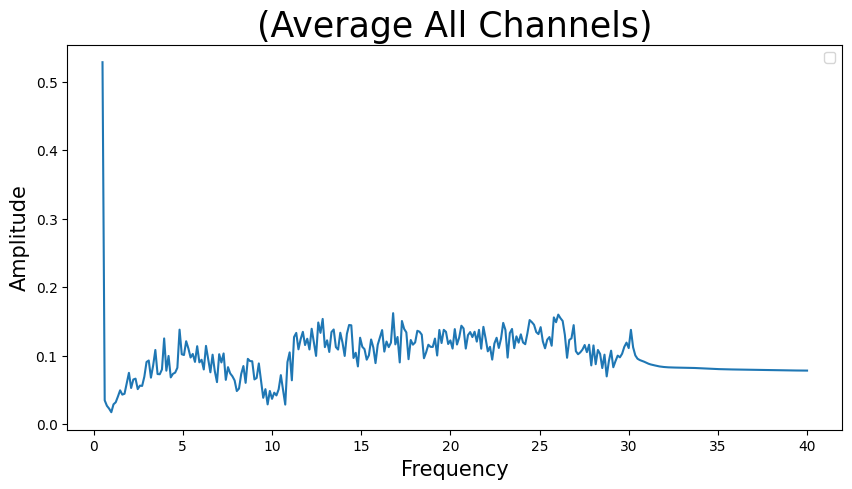

In [35]:
a_avg_all = loaded_data_0_30['features'].mean(axis=1)

plt.figure(figsize=(10, 5))
plt.title('(Average All Channels)', fontsize=25)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Amplitude', fontsize=15)
plt.plot(np.linspace(0.5, 40, len(a_avg_all.mean(axis=0))), a_avg_all.mean(axis=0))
plt.legend()
plt.show()

In [36]:
X_0_30 = loaded_data_0_30['features']
X_0_30 = X_0_30.reshape(X_0_30.shape[0], -1)

X_30_end = loaded_data_30_end['features']
X_30_end = X_30_end.reshape(X_30_end.shape[0], -1)

In [37]:
scaler = StandardScaler()

scaler.fit(X_0_30)  # or X, depending on your data setup

X_0_30 = scaler.transform(X_0_30)

# Dữ liệu mới
X_new_0_30 = torch.tensor(X_0_30, dtype=torch.float32)

# Đặt mô hình ở chế độ đánh giá
model.eval()

# Dự đoán nhãn
with torch.no_grad():
    outputs = model(X_new_0_30)
    preds = torch.argmax(F.softmax(outputs, dim=1), dim=1)

print("Nhãn dự đoán cho dữ liệu từ phút 0 đến phút 30: \n", preds.numpy())

Nhãn dự đoán cho dữ liệu từ phút 0 đến phút 30: 
 [1 0 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 1 2 2 2 2 2 2 2
 2 2 2 2 2 1 2 2 2 2 2 2 1 1 1 0 2 2 2 2 1 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2
 0 2 2 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 2 1 0 1 0 1 1 1 1 2 1 0 1 1 1 0
 1 1 0 1 1 1 1 1 1 1 2 2 1 1 2 1 0 2 1 1 1 1 1 0 0 1 0 1 1 2 0 2 0 0 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0]


Nhãn cho ra của tập dữ liệu 30 phút đầu hợp lý trong trường hợp này

In [39]:
features = loaded_data_0_30['features']  # Đặc trưng
feature_time = loaded_data_0_30['feature_time']  # Thời gian (tuple start, end)

data = {
    'Start Time': [start for start, _ in feature_time],
    'End Time': [end for _, end in feature_time],
    'Features': list(features),
    'Predicted Label': preds.numpy(),
}

df = pd.DataFrame(data)

df

,Start Time,End Time,Features,Predicted Label
0,0.0,7.992188,"[[0.29243658641789594, 0.01945342614838793, 0....",1
1,8.0,15.992188,"[[0.6685328798926236, 0.00016968926470445613, ...",0
2,16.0,23.992188,"[[0.29214078607344085, 0.4200476664788308, 0.1...",2
3,24.0,31.992188,"[[0.23985464263284229, 0.1122716094925585, 0.0...",2
4,32.0,39.992188,"[[0.3716089517885983, 0.08731104886675753, 0.0...",2
...,...,...,...,...
219,1752.0,1759.992188,"[[0.31660159505935503, 0.008041070556156034, 8...",0
220,1760.0,1767.992188,"[[0.5451214588083957, 0.8433354257008405, 0.10...",0
221,1768.0,1775.992188,"[[0.3038392636912093, 0.0004958461951484368, 0...",0
222,1776.0,1783.992188,"[[0.31077402345599126, 0.01613580537912972, 0....",0


In [40]:
df.to_csv('/content/data_for_streamlit/data_0_30.csv', index=False)

In [41]:
scaler = StandardScaler()

scaler.fit(X_30_end)  # or X, depending on your data setup

X_30_end = scaler.transform(X_30_end)

# Dữ liệu mới
X_new_30_end = torch.tensor(X_30_end, dtype=torch.float32)

# Đặt mô hình ở chế độ đánh giá
model.eval()

# Dự đoán nhãn
with torch.no_grad():
    outputs = model(X_new_30_end)
    preds = torch.argmax(F.softmax(outputs, dim=1), dim=1)

print("Nhãn dự đoán cho dữ liệu từ phút 30 đến hết: \n", preds.numpy())

Nhãn dự đoán cho dữ liệu từ phút 30 đến hết: 
 [1 1 1 1 0 1 1 2 0 0 2 0 0 1 0 1 0 1 0 0 1 1 1 2 1 1 0 1 0 1 1 1 1 0 2 0 1
 1 0 0 0 1 2 2 0 2 2 2 2 1 0 0 1 1 1 1 2 2 1 2 2 2 2 2 2 1 2 2 1 2 2 2 2 2
 2 2 2 0 2 1 2 2 2 2 2 2 0 2 2 2 2 1 2 0 1 1 1 2 2 2 0 2 2 1 2 2 2 1 1 1 1
 2 2 2 1 2 2 2 2 0 0 0 0 0 0 2 2 0 0 1 2 2 0 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0
 0 1 1 2 2 2 2 2 1 2 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 0 2 2 0 0 2 2 0 2 0 0 0
 0 0 0 0 0 1 0 0 2 2 0 0 0 2 0 2 0 2 1 1 0 0 2 0 2 1 1 1 1 2 1 1 1 0 0 1 1
 0 0]


In [42]:
features = loaded_data_30_end['features']  # Đặc trưng
feature_time = loaded_data_30_end['feature_time']  # Thời gian (tuple start, end)

data = {
    'Start Time': [start for start, _ in feature_time],
    'End Time': [end for _, end in feature_time],
    'Features': list(features),
    'Predicted Label': preds.numpy(),
}

df = pd.DataFrame(data)

df

,Start Time,End Time,Features,Predicted Label
0,1800.0,1807.992188,"[[0.564935692611094, 0.09981764838022868, 0.06...",1
1,1808.0,1815.992188,"[[0.4943467820510392, 0.21611306182445836, 0.0...",1
2,1816.0,1823.992188,"[[0.48681027352583595, 8.339258054397771e-05, ...",1
3,1824.0,1831.992188,"[[0.7018420460832502, 0.012548763088958815, 0....",1
4,1832.0,1839.992188,"[[0.8518277166281045, 0.1831455894211482, 0.14...",0
...,...,...,...,...
219,3552.0,3559.992188,"[[0.47945107515202956, 0.0005938743469697152, ...",0
220,3560.0,3567.992188,"[[0.5739027991282555, 0.10450392605443296, 0.1...",1
221,3568.0,3575.992188,"[[0.6231862868220865, 0.026618453156204938, 0....",1
222,3576.0,3583.992188,"[[0.7259770947815198, 0.0002528020061830273, 0...",0


In [43]:
df.to_csv('/content/data_for_streamlit/data_30_end.csv', index=False)

In [51]:
import pandas as pd
import plotly.graph_objects as go

# Giả sử df là DataFrame đã có sẵn với các cột 'Start Time' và 'Predicted Label'
# Đảm bảo rằng cột 'Start Time' là kiểu số và 'Predicted Label' là số nguyên (0, 1, 2)

df = pd.read_csv('/content/data_for_streamlit/data_0_30.csv')

# Vẽ đồ thị nhãn theo thời gian
fig = go.Figure()

# Thêm một trace cho nhãn dự đoán theo thời gian
fig.add_trace(go.Scatter(
    x=df['Start Time'],
    y=df['Predicted Label'],
    mode='markers',
    name='Predicted Label',
    marker=dict(size=6, color=df['Predicted Label'], colorscale='Viridis', showscale=True),
    hovertemplate='Time: %{x}<br>Predicted Label: %{y}'
))

# Tùy chỉnh layout
fig.update_layout(
    title="Predicted Labels Over Time",
    xaxis_title="Time (s)",
    yaxis_title="Predicted Label",
    yaxis=dict(tickvals=[0, 1, 2], ticktext=["Drowsy", "Unfocused", "Focused"]),
    hovermode="closest",
    template="plotly_dark"
)

# Hiển thị đồ thị
fig.show()


Biểu đồ hiển thị các nhãn được dự đoán theo thời gian cho ba trạng thái tinh thần: tập trung, không tập trung và buồn ngủ:
- Tổng quan: Biểu đồ mô tả những thay đổi trong nhãn được dự đoán cho ba trạng thái tinh thần trong khoảng thời gian khoảng 1800 giây (30 phút).  
- Trạng thái tập trung: Trạng thái tập trung được biểu thị bằng các chấm màu vàng, xuất hiện tương đối chủ yếu trong khoảng 10 phút đầu của tập dữ liệu. Trạng thái lấy nét dường như xảy ra theo từng đợt ngắn, với thời gian lấy nét lâu nhất kéo dài khoảng 100 giây. Tần suất và thời lượng của trạng thái tập trung dao động theo thời gian.  
- Trạng thái không tập trung: Trạng thái không tập trung được thể hiện bằng đường màu Xanh. Trạng thái này dường như là trạng thái chiếm ưu thế trong khoảng thời gian từ phút thứ 10 đến phút 20. Trạng thái không tập trung thể hiện tính liên tục hơn và ít bị gián đoạn hơn so với trạng thái tập trung.
- Trạng thái buồn ngủ: Trạng thái buồn ngủ được thể hiện bằng đường màu tím.
Trạng thái này xảy ra nhiều trong khoảng 10 phút cuối Trạng thái này dường như ít xảy ra nhất, chỉ có một vài trường hợp trong suốt khoảng thời gian đó.

In [52]:
import pandas as pd
import plotly.graph_objects as go

# Giả sử df là DataFrame đã có sẵn với các cột 'Start Time' và 'Predicted Label'
# Đảm bảo rằng cột 'Start Time' là kiểu số và 'Predicted Label' là số nguyên (0, 1, 2)

df = pd.read_csv('/content/data_for_streamlit/data_30_end.csv')

# Vẽ đồ thị nhãn theo thời gian
fig = go.Figure()

# Thêm một trace cho nhãn dự đoán theo thời gian
fig.add_trace(go.Scatter(
    x=df['Start Time'],
    y=df['Predicted Label'],
    mode='markers',
    name='Predicted Label',
    marker=dict(size=6, color=df['Predicted Label'], colorscale='Viridis', showscale=True),
    hovertemplate='Time: %{x}<br>Predicted Label: %{y}'
))

# Tùy chỉnh layout
fig.update_layout(
    title="Predicted Labels Over Time",
    xaxis_title="Time (s)",
    yaxis_title="Predicted Label",
    yaxis=dict(tickvals=[0, 1, 2], ticktext=["Drowsy", "Unfocused", "Focused"]),
    hovermode="closest",
    template="plotly_dark"
)

# Hiển thị đồ thị
fig.show()


Trạng thái tập trung:
- Trạng thái tập trung, được biểu diễn bằng các chấm vàng, xuất hiện lẻ tẻ trong suốt thời gian quan sát.
- Thời lượng của các tình huống tập trung khác nhau, có lúc kéo dài khoảng 100 giây, nhưng cũng có lúc chỉ ngắn ngủi.
- Tần suất của trạng thái tập trung có sự biến động, với những giai đoạn xuất hiện nhiều và ít hơn.

Trạng thái không tập trung:
- Trạng thái không tập trung, được biểu diễn bằng đường tia xanh lam, dường như là trạng thái chủ đạo.
- Trạng thái không tập trung có sự liên tục hơn, với ít sự gián đoạn hơn so với trạng thái tập trung.
- Trạng thái không tập trung chiếm phần lớn thời gian quan sát, cho thấy người dùng dành phần lớn thời gian trong trạng thái không tập trung.

Trạng thái buồn ngủ:
- Trạng thái buồn ngủ, được biểu diễn bằng đường tím, là trạng thái ít xuất hiện nhất trong ba trạng thái.
Các tình huống buồn ngủ thường ngắn ngủi, không vượt quá 100 giây mỗi lần.
- Trạng thái buồn ngủ xuất hiện một cách không đều đặn trong suốt thời gian quan sát.


